In [1]:
# imports
import sqlalchemy
from sqlalchemy import create_engine, Column, String, Integer, Numeric, MetaData, Table, type_coerce, ForeignKey, case
from sqlalchemy.orm import mapper, create_session, relationship, aliased, Session
from sqlalchemy.ext.declarative import declarative_base
import csv
from sqlalchemy import case
import numpy as np
from sqlalchemy.ext.automap import automap_base
import matplotlib.pyplot as plt
import sqlalchemy.types as types
import numbers
from sqlalchemy.sql import and_, or_, not_, func
from sqlalchemy.sql import select
import os
import glob
import re
from os.path import isfile
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import gsw
import matplotlib.cm as cmm
import matplotlib.colors as col
import matplotlib.colors as col
import createDBfromDFO_OPDB
from netCDF4 import Dataset
%matplotlib inline

In [2]:
mesh=Dataset('/data/eolson/MEOPAR/SS36runs/run08dec15_genMesh/mesh_mask.nc')

In [5]:
print(mesh.variables)

OrderedDict([('nav_lon', <class 'netCDF4._netCDF4.Variable'>
float32 nav_lon(y, x)
unlimited dimensions: 
current shape = (898, 398)
filling off
), ('nav_lat', <class 'netCDF4._netCDF4.Variable'>
float32 nav_lat(y, x)
unlimited dimensions: 
current shape = (898, 398)
filling off
), ('nav_lev', <class 'netCDF4._netCDF4.Variable'>
float32 nav_lev(z)
unlimited dimensions: 
current shape = (40,)
filling off
), ('time_counter', <class 'netCDF4._netCDF4.Variable'>
float64 time_counter(t)
unlimited dimensions: t
current shape = (1,)
filling off
), ('tmask', <class 'netCDF4._netCDF4.Variable'>
int8 tmask(t, z, y, x)
unlimited dimensions: t
current shape = (1, 40, 898, 398)
filling off
), ('umask', <class 'netCDF4._netCDF4.Variable'>
int8 umask(t, z, y, x)
unlimited dimensions: t
current shape = (1, 40, 898, 398)
filling off
), ('vmask', <class 'netCDF4._netCDF4.Variable'>
int8 vmask(t, z, y, x)
unlimited dimensions: t
current shape = (1, 40, 898, 398)
filling off
), ('fmask', <class 'netCDF4._

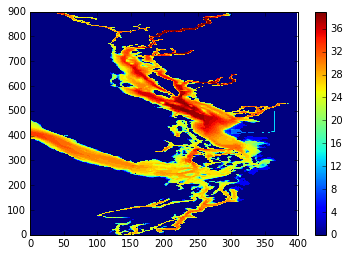

In [8]:
plt.pcolormesh(mesh.variables['mbathy'][0,:,:])
plt.colorbar()

In [10]:
print(mesh.variables['mbathy'][0,:,1])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0

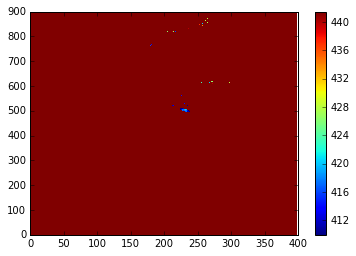

In [13]:
plt.pcolormesh(mesh.variables['gdept_0'][0,-1,:,:])
plt.colorbar()

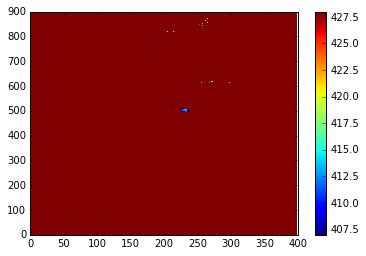

In [14]:
plt.pcolormesh(mesh.variables['gdepw_0'][0,-1,:,:])
plt.colorbar()

In [20]:
bathy_grid=np.zeros(np.shape(mesh.variables['mbathy'][0,:,:]))

In [21]:
bathy_grid.shape

(898, 398)

In [25]:
for jj in range(bathy_grid.shape[0]):
    for ii in range(bathy_grid.shape[1]):
        kk=mesh.variables['mbathy'][0,jj,ii]-1
        if kk<0:
            bathy_grid[jj,ii]=None
        else:
            bathy_grid[jj,ii]=mesh.variables['gdepw_0'][0,kk,jj,ii]

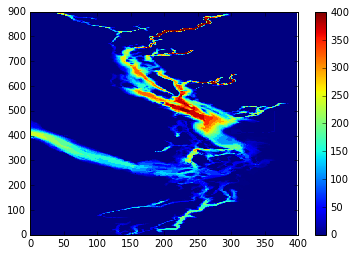

In [24]:
plt.pcolormesh(bathy_grid)
plt.colorbar()